# NLTK - Natural Language Toolkit

Natural Language Toolkit (NLTK) is a Python library that allows us to easily perform various text analyses on policy texts.

NLTK includes a massive amount of useful tools. In this notebook, we will look at a few of them.

## Setup
We start by importing the NLTK library, the pandas library and the langdetect library. If langdetect is not installed, we can install it with `!pip install langdetect`. We specifically import the `detect` function from langdetect. We also import pandas to handle the dataset.

In [1]:
import pandas as pd

import nltk

from langdetect import detect

## Load data

We load the data from a CSV-file.

In [2]:
df = pd.read_csv('./data/cookies.csv')

### Prepare the data

To remove duplicates on the specific column, `policy_text`, we use `df.drop_duplicates(subset=['policy_text'])`.

In [3]:
df = df.drop_duplicates(subset=['policy_text'])

Using the library langdetect we can easily identify the language of a text with relatively high precision.

In [4]:
df['policy_lan'] = df.apply(lambda row: detect(row['policy_text']) if isinstance(row['policy_text'], str) else None, axis=1)

Now we can subset our data based on language, which is very useful when we start analysing the text.

For instance, we can create a DataFrame with English policy texts and a DataFrame with Danish policy texts.

In [5]:
en_df = df[df['policy_lan'] == 'en']

da_df = df[df['policy_lan'] == 'da']

 We need our text data in the form of a text string to use the nltk module. 

In [6]:
text_str_en = ' '.join(en_df['policy_text'])

text_str_da = ' '.join(da_df['policy_text'])

In order to work with our text data, we need to process our text strings a bit.

First, we convert the text into a list of tokens with the NLTK `word_tokenize()` function. We also create a NLTK `Text` object which allows us to apply various NLTK methods.

In [7]:
tokens_en = nltk.word_tokenize(text_str_en)

tokens_da = nltk.word_tokenize(text_str_da)

The `Text` object is created from the list of tokens.

In [8]:
text_en = nltk.Text(tokens_en)

text_da = nltk.Text(tokens_da)

## NLTK methods

With our `Text` objects we can perform a number of text analyses.

### `count()`
The simplest method is `count()`, which returns the count of a specific term.

In [9]:
print (text_en.count('Google'))

print (text_da.count('Google'))

294
38


### `collocation_list()`
Similar to the n-grams notebook, `collocation_list()` returns a list of the most common word pairs in the text. Notice, that in some versions of Python `collocation_list()` doesn't work. If this is the case, try `collocations()` instead.

In [10]:
print (text_en.collocation_list())

print ('\n')

print (text_da.collocation_list())

[('Personal', 'Data'), ('personal', 'data'), ('Privacy', 'Policy'), ('third', 'parties'), ('personal', 'information'), ('third', 'party'), ('service', 'providers'), ('Personal', 'Information'), ('email', 'address'), ('may', 'also'), ('United', 'States'), ('Data', 'Protection'), ('data', 'protection'), ('Privacy', 'Shield'), ('social', 'media'), ('legitimate', 'interest'), ('Please', 'note'), ('New', 'York'), ('operating', 'system'), ('Economic', 'Area')]


[('HTML', 'Local'), ('Local', 'Storage'), ('HTTP', 'Cookie'), ('Berlingske', 'Media'), ('dine', 'personoplysninger'), ('Persistent', 'HTML'), ('JP/Politikens', 'Hus'), ('dit', 'samtykke'), ('Media', 'A/S'), ('ret', 'til'), ('forbindelse', 'med'), ('enhver', 'tid'), ('adgang', 'til'), ('sociale', 'medier'), ('henhold', 'til'), ('legitime', 'interesse'), ('brugerens', 'video-afspiller-præferencer'), ('med', 'henblik'), ('det', 'muligt'), ('indlejret', 'YouTube')]


### `concordance()`
The `concordance()` method returns the context of a specific term. The length of the output can be modified with the `width` and `lines` keyword-parameters.

In [11]:
print (text_en.concordance('Google'))

print ('\n')

print (text_da.concordance('Google'))

Displaying 25 of 294 matches:
LinkedIn , Twitter , Facebook , and Google products , including YouTube . Your
7001:2013 vendor approval process . Google Analytics We use Google Analytics a
l process . Google Analytics We use Google Analytics as a web analysis solutio
ur digital solutions to the service Google offers for analysis . In this regar
ers for analysis . In this regard , Google Analytics functions as a “ Data pro
ts . The recordings are stored with Google . We delete the recordings maximum 
elow : For Android : ( 1 ) Open the Google Settings app on your device ; and (
methods : Method 1 : ( 1 ) Open the Google Settings app on your device ; ( 2 )
 web analytics tools , specifically Google Analytics to track your interaction
 statistical reports . Where we use Google Analytics , we share this informati
cs , we share this information with Google to help Google improve its capabili
his information with Google to help Google improve its capabilities for analyz
 sites . For more info

### `similar()`
In order to identify words that appear in a similar context, we can use the `similar()` method. This can sometimes be useful if we want to look for similar concept sand synonyms.

In [12]:
print (text_en.similar('data'))

print ('\n')

print (text_da.similar('data'))

information content services cookies service request website consent
rights processing device privacy site account and the use websites
sites browser
None


personoplysninger oplysninger cookies persondata os informationer valg
rettigheder apps hvis kan dig bruges brugere behandling lovgivning
artikel browserindstillinger funktioner privatlivspolitik
None


## Frequency distribution
Frequency distribution is another useful tool built into NLTK which gives us a quick overview of the most common words in our text.

We generate the frequency distribution from our list of tokens with the `FreqDist()` function.

In [13]:
fdist_en = nltk.FreqDist(tokens_en)

fdist_da = nltk.FreqDist(tokens_da)

We can then inspect the most common words. The `most_common()` method returns a number of the most common tokens and how many times they appear in the text.

In [14]:
print (fdist_en.most_common(10))

print('\n')

print (fdist_da.most_common(10))

[(',', 10176), ('to', 6618), ('the', 6396), ('.', 5958), ('and', 5642), ('of', 4432), ('you', 3753), ('or', 3713), ('your', 3640), ('information', 2495)]


[(',', 2152), ('.', 1472), ('at', 936), ('og', 926), ('af', 915), ('til', 781), ('du', 573), ('på', 549), ('for', 533), ('i', 509)]


The immediate results are not very interesting. This is a good time for some data cleaning.

### Removing stop words
Our initial results included a lot of short, uninteresting words. These are commonly known as stop words. We can exclude these from our analysis by applying a list of stop words.

For this purpose, NLTK has a built-in list of stop words that we can use.

In [15]:
stopwords_en = nltk.corpus.stopwords.words('english')

stopwords_da = nltk.corpus.stopwords.words('danish')

We then filter the list of tokens against the stop words. First, we create a new, empty list for the filtered tokens. We then iterate over the list of tokens and for each word, we check if the word is in the stop words list. To get rid of punctuation, we also check if the word consists of characters with the string method `isalpha()`. If these two conditions are met, we append the word to our new list.

In [16]:
filtered_tokens_en = []

for word in tokens_en:
    if word.lower() not in stopwords_en and word.isalpha():
        filtered_tokens_en.append(word)
        
        
filtered_tokens_da = []

for word in tokens_da:
    if word.lower() not in stopwords_da and word.isalpha():
        filtered_tokens_da.append(word)

Now we can create a new frequency distribution from the filtered tokens.

In [17]:
fdist_filtered_en = nltk.FreqDist(filtered_tokens_en)

fdist_filtered_da = nltk.FreqDist(filtered_tokens_da)

In [18]:
print (fdist_filtered_en.most_common(10))

print ('\n')

print (fdist_filtered_da.most_common(10))

[('information', 2495), ('data', 1649), ('may', 1542), ('use', 1312), ('personal', 1104), ('Data', 1025), ('us', 1000), ('Privacy', 693), ('Personal', 681), ('services', 649)]


[('kan', 395), ('personoplysninger', 371), ('vores', 336), ('dine', 330), ('oplysninger', 222), ('cookies', 196), ('data', 152), ('dit', 126), ('ved', 118), ('bruger', 111)]


The results are better than before but we still have a lot of uninteresting words.

### Custom stop words list
Whenever the NLTK stop words list is insufficient we can supply our own list of stop words which can be tailored to a specific domain.

We add new stop words to the list using append to list. 

In [19]:
new_stop_words_en = ('may','use')
for i in new_stop_words_en:
    stopwords_en.append(i)
    
new_stop_words_da = ('dit','ved')
for i in new_stop_words_da:
    stopwords_da.append(i)

We now create a new list for words filtered against our custom stop words list.

Notice, that we also convert each word to lower case in order to catch more stop words.

In [20]:
clean_tokens_en = []

for word in tokens_en:
    if word.lower() not in stopwords_en and word.isalpha():
        clean_tokens_en.append(word.lower())
        
        
clean_tokens_da = []

for word in tokens_da:
    if word.lower() not in stopwords_da and word.isalpha():
        clean_tokens_da.append(word.lower())

We create a new frequency distributions and inspect the results.

In [21]:
fdist_clean_en = nltk.FreqDist(clean_tokens_en)

fdist_clean_da = nltk.FreqDist(clean_tokens_da)

In [22]:
print (fdist_clean_en.most_common(20))

print ('\n')

print (fdist_clean_da.most_common(20))

[('information', 3094), ('data', 2697), ('personal', 1796), ('services', 1142), ('privacy', 1130), ('us', 1126), ('service', 770), ('cookies', 734), ('website', 646), ('content', 624), ('policy', 621), ('provide', 598), ('third', 551), ('collect', 543), ('also', 470), ('including', 454), ('contact', 444), ('request', 431), ('processing', 419), ('rights', 411)]


[('kan', 396), ('personoplysninger', 386), ('vores', 358), ('dine', 350), ('oplysninger', 249), ('cookies', 229), ('data', 158), ('bruger', 112), ('samtykke', 111), ('andre', 93), ('indsamler', 92), ('media', 89), ('brug', 88), ('cookie', 87), ('berlingske', 85), ('hvordan', 70), ('indhold', 68), ('soundcloud', 68), ('annoncer', 67), ('platformen', 62)]


Again, the results are better but not perfect.

### Word length
Most of the common words in our filtered text are short and does not carry a lot of meaning. If we assume that short words in general are uninteresting, we can filter our text again and only keep words above a certain length.

Below create a new list of tokens and only keep words with a length above six characters.

In [23]:
long_tokens_en = []

for word in filtered_tokens_en:
    if len(word) > 6:
        long_tokens_en.append(word)
        
        
long_tokens_da = []

for word in filtered_tokens_da:
    if len(word) > 6:
        long_tokens_da.append(word)

We create a frequency distribution of the long words and inspect the most common words.

In [24]:
fdist_long_en = nltk.FreqDist(long_tokens_en)

fdist_long_da = nltk.FreqDist(long_tokens_da)

In [25]:
print (fdist_long_en.most_common(20))

print ('\n')

print (fdist_long_da.most_common(20))

[('information', 2495), ('personal', 1104), ('Privacy', 693), ('Personal', 681), ('services', 649), ('cookies', 567), ('provide', 566), ('Information', 554), ('collect', 511), ('Services', 480), ('including', 451), ('Service', 450), ('privacy', 418), ('content', 401), ('request', 397), ('process', 373), ('processing', 364), ('account', 343), ('consent', 340), ('website', 337)]


[('personoplysninger', 371), ('oplysninger', 222), ('cookies', 196), ('samtykke', 108), ('Berlingske', 85), ('indsamler', 75), ('SoundCloud', 68), ('indhold', 67), ('annoncer', 66), ('platformen', 60), ('beskyttelse', 59), ('behandler', 58), ('hjemmesiden', 57), ('Storage', 55), ('tjenester', 54), ('hvordan', 53), ('behandling', 50), ('persondata', 47), ('herunder', 46), ('rettigheder', 46)]


Now our results are somewhat interesting, as we have a lot more meaningful words.

### Plotting frequency distribution
For a visual representation of the frequency distribution we can use the `plot()` method. We supply the method with the number of words we want to include.

Notice, that if we call the method without a number, Python will attempt to include all unique words in the text, which will be a very taxing operation without any value to us.

We can add a title to our plot with the `title` keyword.

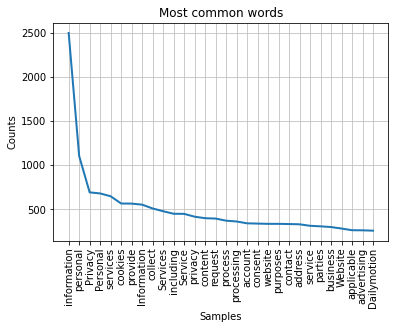

<AxesSubplot:title={'center':'Most common words'}, xlabel='Samples', ylabel='Counts'>

In [26]:
fdist_long_en.plot(30, title='Most common words')

We can also count the terms cumulatively with the `cumulative` keyword.

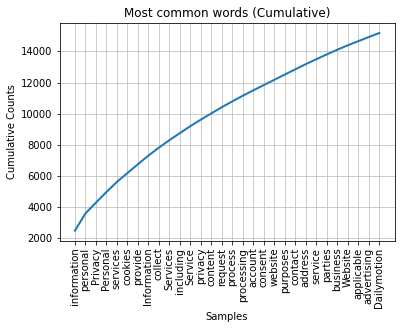

<AxesSubplot:title={'center':'Most common words (Cumulative)'}, xlabel='Samples', ylabel='Cumulative Counts'>

In [27]:
fdist_long_en.plot(30, title='Most common words (Cumulative)', cumulative=True)

## Wrap up

NLTK is a very large and powerful Python library and the possibilities are virtually endless. In this notebook, we have scratched the surface and demonstrated some of the tools.

We have converted our data to a `Text` object which allows us to perform a number analyses with little effort. We have also worked with frequency distributions and refined our data for a better result.

The examples in this notebook are adapted from the book [Natural Language Processing with Python](https://www.nltk.org/book/), which is a recommended resource if you want to learn more about NLTK.